In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = datasets.load_iris()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = data.target.astype(str)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=11)
X_train.shape, X_test.shape

((135, 2), (15, 2))

In [8]:
clf_tree = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()
clf_xgb = GradientBoostingClassifier()

In [9]:
clf_tree.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
_ = clf_xgb.fit(X_train, y_train)

In [10]:
preds_train_tree = clf_tree.predict(X_train)
preds_train_rf = clf_rf.predict(X_train)
preds_train_xgb = clf_xgb.predict(X_train)

In [11]:
print(accuracy_score(y_train, preds_train_tree))
print(accuracy_score(y_train, preds_train_rf)) # The same because there is not a lot of data to work with
print(accuracy_score(y_train, preds_train_xgb))

0.9407407407407408
0.9407407407407408
0.9407407407407408


In [12]:
preds_test_tree = clf_tree.predict(X_test)
preds_test_rf = clf_rf.predict(X_test)
preds_test_xgb = clf_xgb.predict(X_test)

In [13]:
print(accuracy_score(y_test, preds_test_tree))
print(accuracy_score(y_test, preds_test_rf))
print(accuracy_score(y_test, preds_test_xgb))

0.5333333333333333
0.6
0.6


In [14]:
clf_rf.feature_importances_ # Probability of how often the X features account for the root node split

array([0.6650766, 0.3349234])

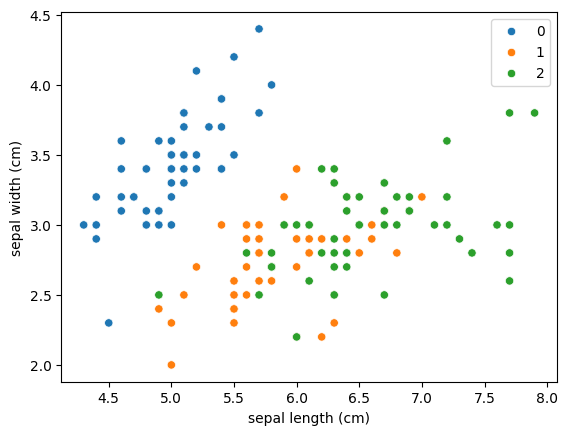

In [15]:
_ = sns.scatterplot(data= df, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = y)

In [16]:
clf_stack = StackingClassifier(estimators = [('tree', DecisionTreeClassifier()),
                                             ('rf', RandomForestClassifier()),
                                             ('xgb', GradientBoostingClassifier())],
                               final_estimator = LogisticRegression())

In [17]:
clf_stack.fit(X_train, y_train)

StackingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('xgb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [18]:
preds_train_stack = clf_stack.predict(X_train)

In [19]:
accuracy_score(y_train, preds_train_stack)

0.9407407407407408

In [20]:
preds_test_stack = clf_stack.predict(X_test)

In [21]:
accuracy_score(y_test, preds_test_stack)

0.5333333333333333

In [22]:
X_train.shape, X_test.shape # We can increase our test-train proportion split because our accuracy score isn't quite overfitting yet (changed from 0.8 -> 0.9)

((135, 2), (15, 2))